# Estatística Descritiva

O dataset fornecido resume os gastos com tratamentos médicos dos colaboradores de um determinado plano de saúde.

As informações estão separadas por colunas e são:

- **Idade** - Idade do colaborador
- **Sexo** - Sexo do colaborador
- **IMC** - IMC do colaborador seguindo a fórmula $\frac{kg}{m^2}$
- **Quantidade de dependentes** - A coluna "qtd_criancas" resume a quantidade de dependentes do colaborador
- **Fumante** - Indica se o colaborador é fumante ou não
- **Região** - Região onde vive o colaborador
- **Custos** - Total de gastos em saúde pelo colaborador e seus dependentes

In [46]:
!ls

dados.xls						     sample_data
Projeto Final - Prova P2 - 1 Sem 2018 - Data 06-06-2018.pdf  teste.png


In [47]:
!pip install seaborn --upgrade
!pip install xlwt

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
# bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Na primeira etapa, vamos importar o arquivo csv para ter acesso ao dados, para isso, utilizaremos a biblioteca `pandas`

In [0]:
dados = pd.read_csv('https://github.com/pgiaeinstein/comp_cog/raw/master/custo_colaborador.csv')

Vamos verificar se a estrutura dos dados importados está correta

In [50]:
dados.head(10)

,idade,sexo,imc,qtd_criancas,fumante,regiao,custos
0,19,feminino,27.900,0,sim,sudoeste,16884.92400
1,18,masculino,33.770,1,não,sudeste,1725.55230
2,28,masculino,33.000,3,não,sudeste,4449.46200
3,33,masculino,22.705,0,não,noroeste,21984.47061
4,32,masculino,28.880,0,não,noroeste,3866.85520
5,31,feminino,25.740,0,não,sudeste,3756.62160
6,46,feminino,33.440,1,não,sudeste,8240.58960
7,37,feminino,27.740,3,não,noroeste,7281.50560
8,37,masculino,29.830,2,não,nordeste,6406.41070
9,60,feminino,25.840,0,não,noroeste,28923.13692


Na próxima etapa, vamos verificar a existência de dados faltantes no dataset importado

In [51]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
idade           1338 non-null int64
sexo            1338 non-null object
imc             1338 non-null float64
qtd_criancas    1338 non-null int64
fumante         1338 non-null object
regiao          1338 non-null object
custos          1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [52]:
dados.isnull().sum()

idade           0
sexo            0
imc             0
qtd_criancas    0
fumante         0
regiao          0
custos          0
dtype: int64

Verificamos que não existem dados faltantes em nosso dataset.

Podemos verificar que as colunas sexo, fumante e região possuem dados categóricos. Como iremos explorar estes dados, para facilitar nosso trabalho, podemos criar um dicionário com valores numéricos representando cada variável categórica.

Existem algumas maneiras de realizar este processo de `encode` de variáveis como por exemplo utilizar a classe `LabelEncoder` do pacote `preprocessing` da biblioteca SciKit-Learn.

Para facilitar o entendimento, iremos criar nossos dicionários e utilizar o método `map` da biblioteca `pandas` para resolver o problema.

Primeiro vamos verificar quantos tipos de variáveis categóricas temos em cada uma destas colunas.

In [53]:
dados['sexo'].value_counts()

masculino    676
feminino     662
Name: sexo, dtype: int64

In [54]:
dados.fumante.value_counts()

não    1064
sim     274
Name: fumante, dtype: int64

In [55]:
dados.regiao.value_counts()

sudeste     364
noroeste    325
sudoeste    325
nordeste    324
Name: regiao, dtype: int64

Agora que temos a relação de variáveis categóricas, podemos criar um `encode` para estes dados:

In [0]:
encode_sexo = {
    'feminino' : 0,
    'masculino' : 1
}

encode_fumante = {
    'não' : 0,
    'sim' : 1
}

encode_regiao = {
    'sudeste' : 1,
    'noroeste' : 2,
    'sudoeste' : 3,
    'nordeste' : 4
}

Criamos nossas estruturas representativas dos dados categóricos. O próximo passo é aplicar um mapeamento destes valores no nosso dataframe:

In [0]:
dados.sexo = dados.sexo.map(encode_sexo)
dados.fumante = dados.fumante.map(encode_fumante)
dados.regiao = dados.regiao.map(encode_regiao)

Vamos verificar se as modificações foram executadas com sucesso:

In [58]:
dados.head()

,idade,sexo,imc,qtd_criancas,fumante,regiao,custos
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Agora que temos tudo organizado e padronizado, vamos verificar a correlação das variáveis, para isso, vamos plotar um gráfico do tipo `heatmap` que facilita nossa visualização das informações.

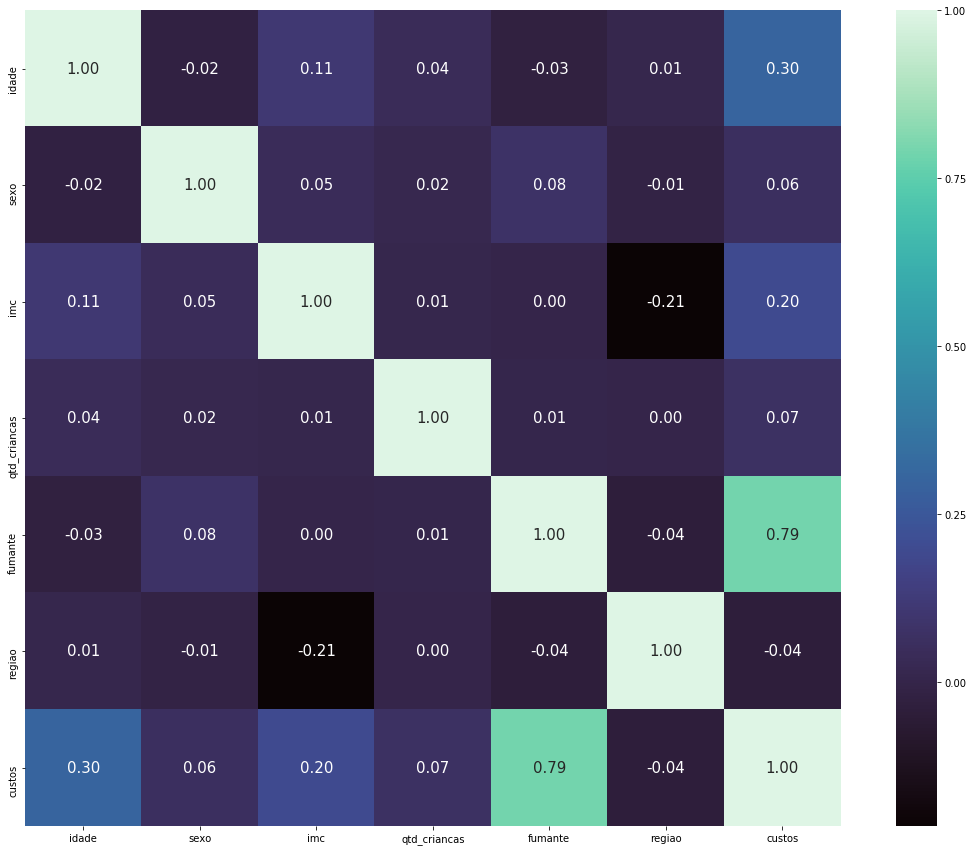

In [59]:
correlacao = dados.corr()

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(dados.corr(), xticklabels = dados.columns, yticklabels = dados.columns, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws={ 'size' : 15}, cmap = 'mako', ax = ax)

In [60]:
dados.corr()

,idade,sexo,imc,qtd_criancas,fumante,regiao,custos
idade,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.010265,0.299008
sexo,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.010170,0.057292
imc,0.109272,0.046371,1.000000,0.012759,0.003750,-0.213489,0.198341
qtd_criancas,0.042469,0.017163,0.012759,1.000000,0.007673,0.000107,0.067998
fumante,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
regiao,0.010265,-0.010170,-0.213489,0.000107,-0.038873,1.000000,-0.040728
custos,0.299008,0.057292,0.198341,0.067998,0.787251,-0.040728,1.000000


In [61]:
dados.corr()

,idade,sexo,imc,qtd_criancas,fumante,regiao,custos
idade,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.010265,0.299008
sexo,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.010170,0.057292
imc,0.109272,0.046371,1.000000,0.012759,0.003750,-0.213489,0.198341
qtd_criancas,0.042469,0.017163,0.012759,1.000000,0.007673,0.000107,0.067998
fumante,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
regiao,0.010265,-0.010170,-0.213489,0.000107,-0.038873,1.000000,-0.040728
custos,0.299008,0.057292,0.198341,0.067998,0.787251,-0.040728,1.000000


A matriz de correlação nos traz uma informação interessante; Existe uma forte correlação entre a coluna `fumante` e a coluna `custo`.

Acima trouxemos a soma de fumantes e não fumantes em nossa base, vamos repetir o comando para ter uma ideia da diferença entre os dois grupos:

In [62]:
dados.fumante.value_counts()

0    1064
1     274
Name: fumante, dtype: int64

Existe um número muito superior de não fumantes em relação aos fumantes, podemos plotar um gráfico para facilitar a visualização:

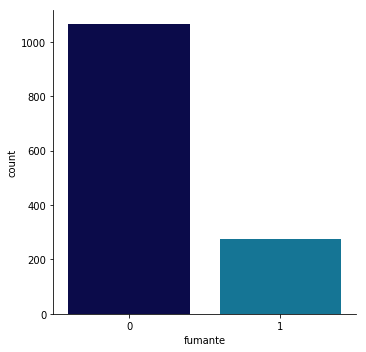

In [63]:
sns.catplot(x = 'fumante', data = dados, kind = 'count', palette = 'ocean')

Vamos verificar qual é a distribuição dos custos entre fumantes e não fumantes, para isso, vamos plotar dois histogramas:

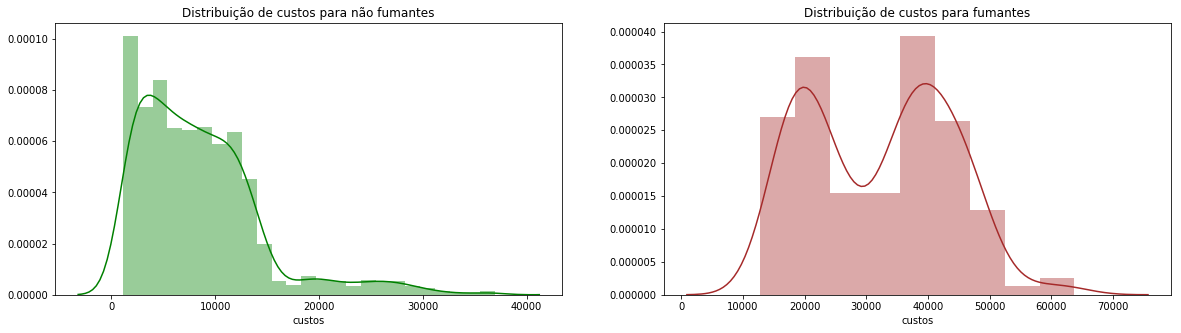

In [64]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(121)
ax.set_title('Distribuição de custos para não fumantes')
sns.distplot(dados[(dados.fumante == 0)]['custos'], color = 'green', ax = ax)

ax = fig.add_subplot(122)
ax.set_title('Distribuição de custos para fumantes')
sns.distplot(dados[(dados.fumante == 1)]['custos'], color = 'brown', ax = ax)
fig.savefig('teste.png')

Note que os gráficos acima nos mostram que os gastos com fumantes são maiores em relação aos não fumantes, porém é importante lembrar que nos nossos dados, o número de não fumantes é maior.

Como será a distribuição de gastos por sexo? Vamos plotar mais dois histogramas para facilitar nossa visualização.

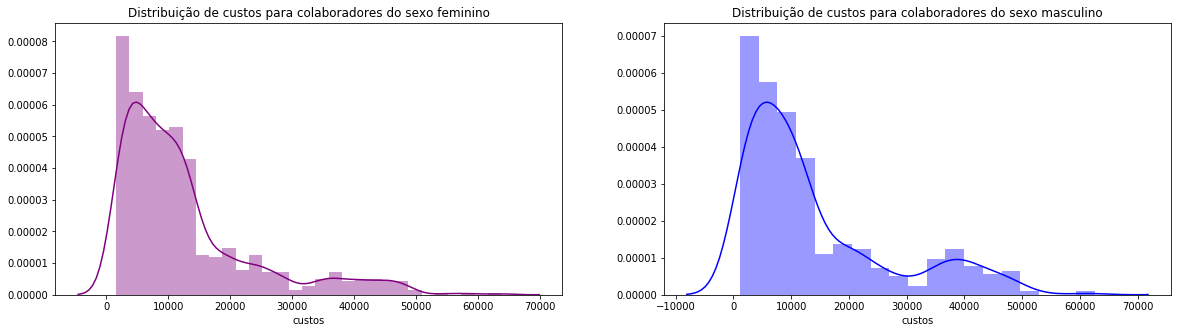

In [65]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(121)
ax.set_title('Distribuição de custos para colaboradores do sexo feminino')
sns.distplot(dados[(dados.sexo == 0)]['custos'], color = 'purple', ax = ax)

ax = fig.add_subplot(122)
ax.set_title('Distribuição de custos para colaboradores do sexo masculino')
sns.distplot(dados[(dados.sexo == 1)]['custos'], color = 'blue', ax = ax)

Não vemos uma variação significativa nas distribuições. Vamos verificar a distribuição de custos pela região.

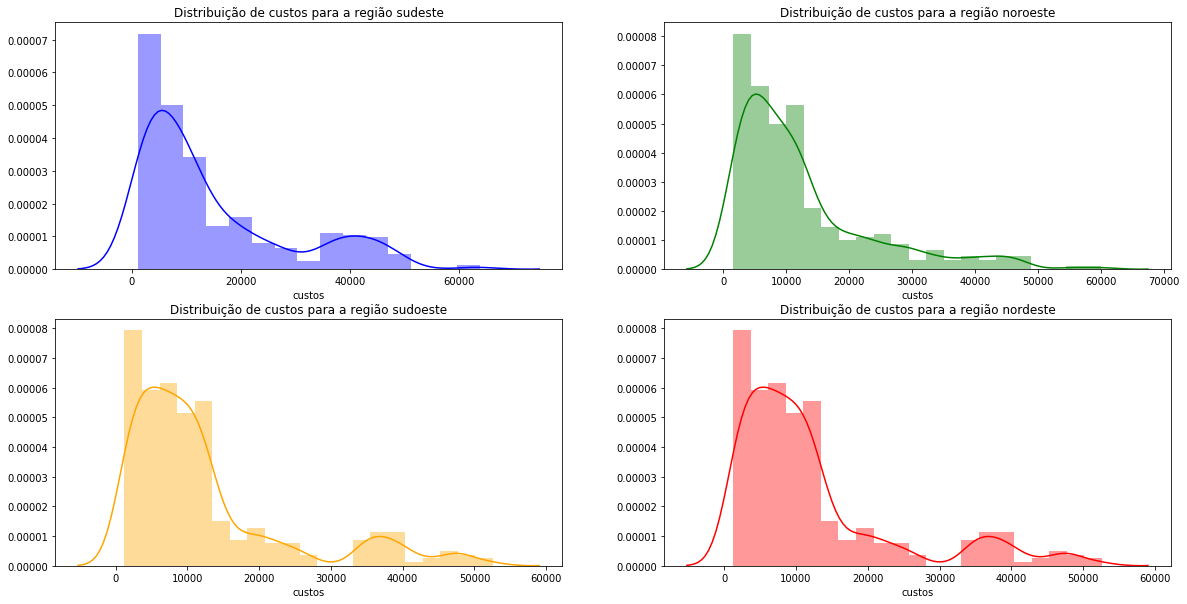

In [66]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(221)
ax.set_title('Distribuição de custos para a região sudeste')
sns.distplot(dados[dados.regiao == 1]['custos'], color = 'blue', ax = ax)

ax = fig.add_subplot(222)
ax.set_title('Distribuição de custos para a região noroeste')
sns.distplot(dados[dados.regiao == 2]['custos'], color = 'green', ax = ax)

ax = fig.add_subplot(223)
ax.set_title('Distribuição de custos para a região sudoeste')
sns.distplot(dados[dados.regiao == 3]['custos'], color = 'orange', ax = ax)

ax = fig.add_subplot(224)
ax.set_title('Distribuição de custos para a região nordeste')
sns.distplot(dados[dados.regiao == 3]['custos'], color = 'red', ax = ax)

Note que as distribuições tem um padrão similar, apenas a região noroeste tem uma frequência menor na regição dos 40.000.

Como será que os valores de custo se distribuem em relação ao sexo e ao consumo de nicotina?

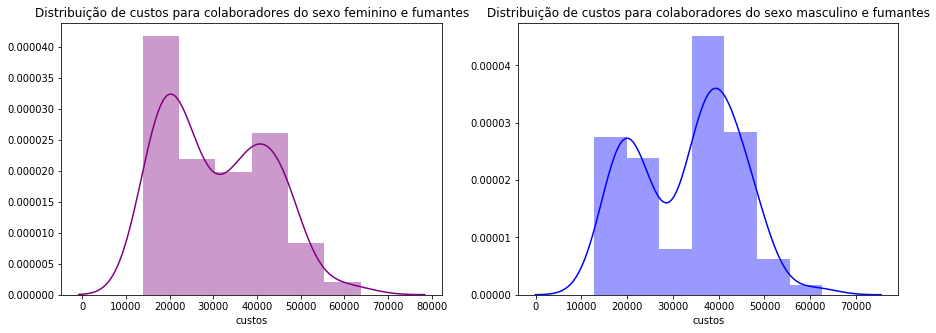

In [67]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(121)
ax.set_title('Distribuição de custos para colaboradores do sexo feminino e fumantes')
sns.distplot(dados[(dados.fumante == 1) & (dados.sexo == 0)]['custos'], color = 'purple', ax = ax)

ax = fig.add_subplot(122)
ax.set_title('Distribuição de custos para colaboradores do sexo masculino e fumantes')
sns.distplot(dados[(dados.fumante == 1) & (dados.sexo == 1)]['custos'], color = 'blue', ax = ax)

Aqui vemos um comportamento interessante, é seguro assumir que colaboradores do sexo masculino e tabagistas tem um custo maior com tratamento?

Vamos investigar como se comportam os dados por sexo do colaborador, lembrando que verificamos que há um número maior de colaboradores não fumantes.

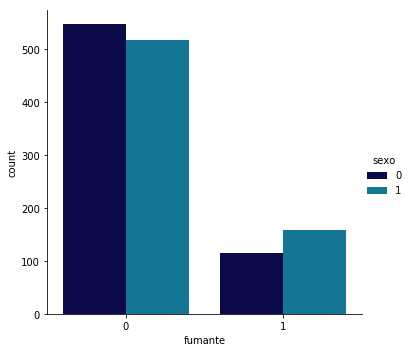

In [68]:
sns.catplot(x = 'fumante', kind = 'count', hue = 'sexo', palette = 'ocean', data = dados)

O número de homens fumantes é maior, existe um indício de que o custo com tratamento de homens é maior do que em relação as mulheres quando o colaborador é fumante.

Vamos verificar:

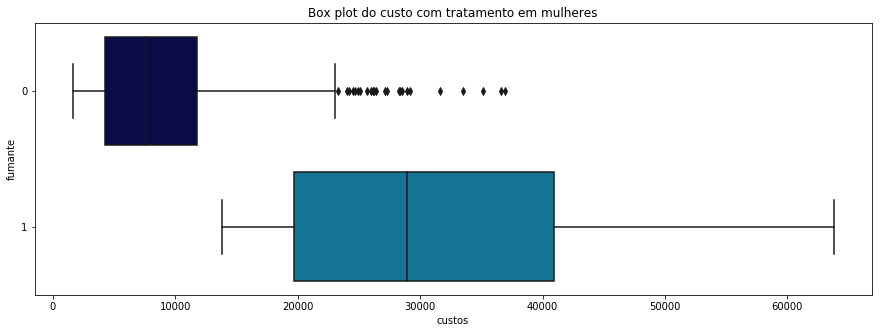

In [69]:
plt.figure(figsize=(15,5))
plt.title("Box plot do custo com tratamento em mulheres")
sns.boxplot(y = 'fumante', x = 'custos', data =  dados[(dados.sexo == 0)] , orient = 'h', palette = 'ocean')

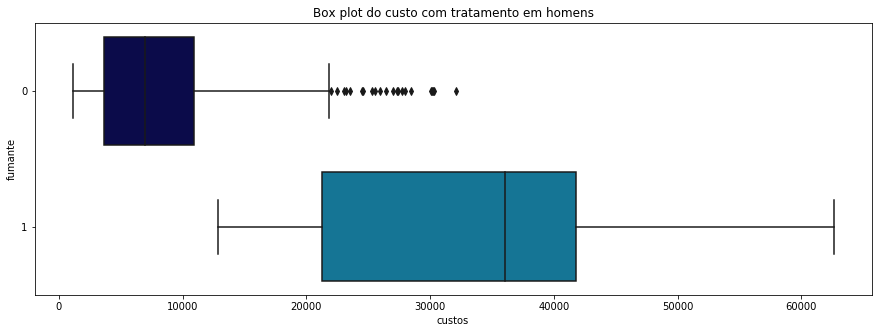

In [70]:
plt.figure(figsize=(15,5))
plt.title("Box plot do custo com tratamento em homens")
sns.boxplot(y = 'fumante', x = 'custos', data =  dados[(dados.sexo == 1)] , orient = 'h', palette = 'ocean')

![title](http://www.abgconsultoria.com.br/blog/wp-content/uploads/boxplot-1-1024x664.png)

In [71]:
dados[(dados.sexo == 0)]['custos'].sum()

8321061.194619

In [72]:
dados[(dados.sexo == 1)]['custos'].sum()

9434763.79614

In [73]:
dados.sexo.value_counts()

1    676
0    662
Name: sexo, dtype: int64

Vemos que o número de homens é superior ao de mulheres, assim como a soma de valores dos custos de tratamentos com homens é maior.

Vamos verificar quais são as somatórias destes valores apenas considerando os fumantes.

In [0]:
fumantes = dados[dados.fumante == 1]

In [75]:
fumantes[(fumantes.sexo == 0)]['custos'].sum()

3528084.57177

In [76]:
fumantes[(fumantes.sexo == 1)]['custos'].sum()

5253678.950070001

In [77]:
fumantes.sexo.value_counts()

1    159
0    115
Name: sexo, dtype: int64

Veja que, neste nosso conjunto de dados, temos um maior número de homens fumantes. É importante sempre considerar este tipo de informação.

Vamos adicionar outra variável ao nosso estudo; Como será que os dados se comportam se considerarmos a idade dos colaboradores?

Vamos verificar qual a distribuição da idade em nosso conjunto de dados:

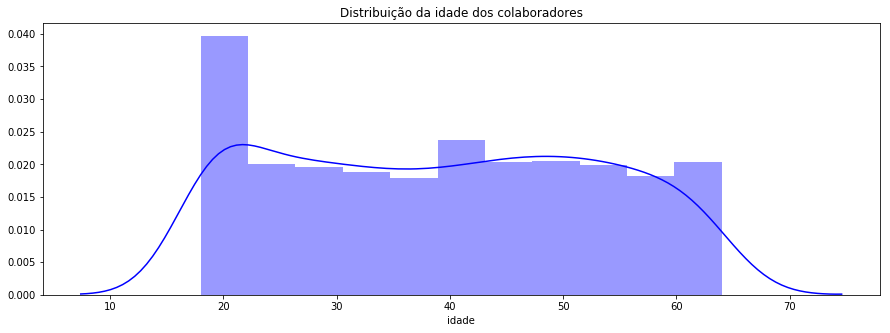

In [78]:
plt.figure(figsize=(15,5))
plt.title("Distribuição da idade dos colaboradores")
sns.distplot(dados.idade, color = 'blue')

Existe um número maior de colaboradores com idade próxima aos 20 anos, vamos verificar qual é o intervalo entre os dados de idade:

In [79]:
dados.idade.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: idade, dtype: float64

A idade mínima em nossa base é de 18 anos e a máxima de 64 anos. Vamos verificar como os dados se comportam se considerarmos a idade e o consumo de tabaco nesta faixa dos 18 ~ 20 anos: 

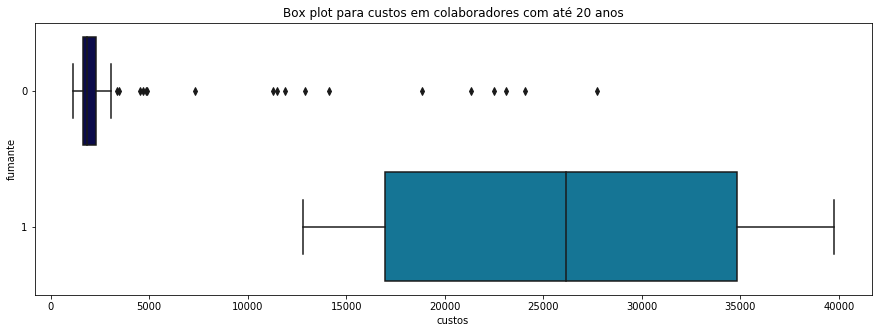

In [80]:
plt.figure(figsize=(15,5))
plt.title("Box plot para custos em colaboradores com até 20 anos")
sns.boxplot(y = 'fumante', x = 'custos', data = dados[dados.idade <= 20] , orient = 'h', palette = 'ocean')

Veja que informação interessante temos aqui, repare na diferença do custo com colaboradores fumantes e lembre que estamos apenas verificando o comportamento em colaboradores com idade até 20 anos.

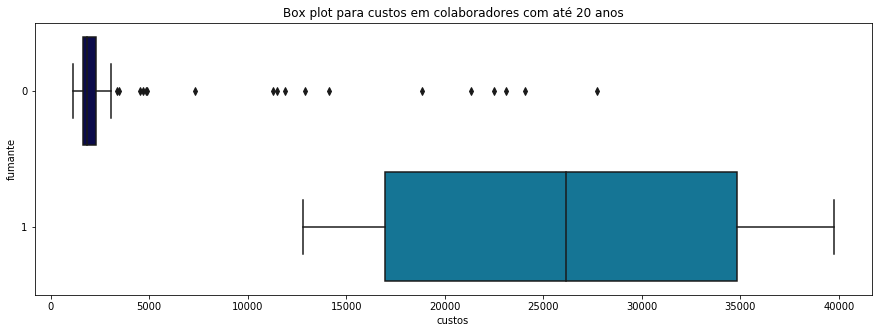

In [81]:
plt.figure(figsize=(15,5))
plt.title("Box plot para custos em colaboradores com até 20 anos")
sns.boxplot(y = 'fumante', x = 'custos', data = dados[dados.idade <= 20] , orient = 'h', palette = 'ocean')

Será que há alguma diferença entre os intervalos de idade? Vamos verificar como se comportam os dados em 3 intervalos:

- colaboradores abaixo dos 27 anos
- colaboradores entre 27 anos e 51 anos
- colaboradores acima dos 51 anos

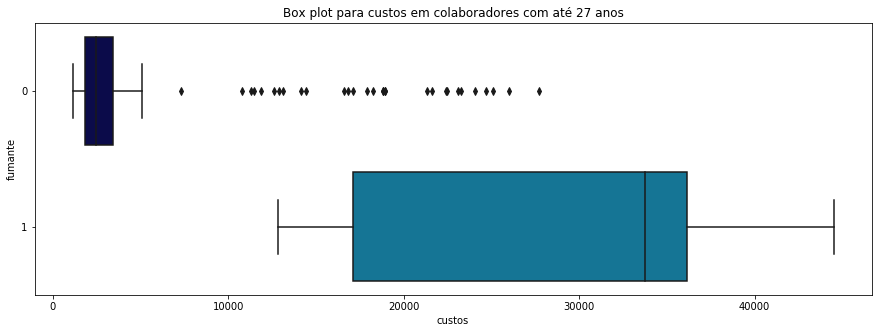

In [82]:
plt.figure(figsize=(15,5))
plt.title("Box plot para custos em colaboradores com até 27 anos")
sns.boxplot(y = 'fumante', x = 'custos', data = dados[dados.idade <= 27] , orient = 'h', palette = 'ocean')

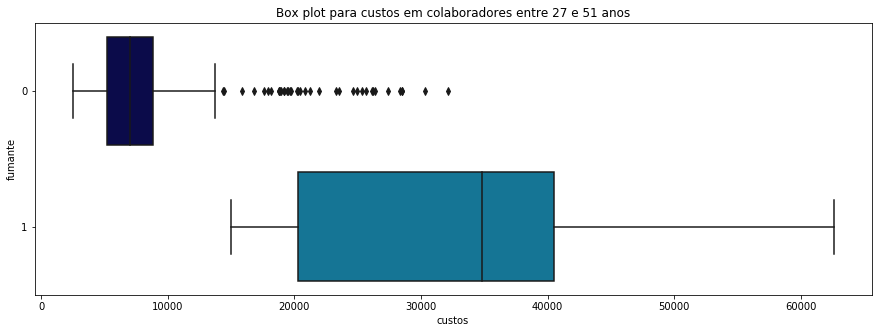

In [83]:
plt.figure(figsize=(15,5))
plt.title("Box plot para custos em colaboradores entre 27 e 51 anos")
sns.boxplot(y = 'fumante', x = 'custos', data = dados[(dados.idade >= 27) & (dados.idade <= 51)] , orient = 'h', palette = 'ocean')

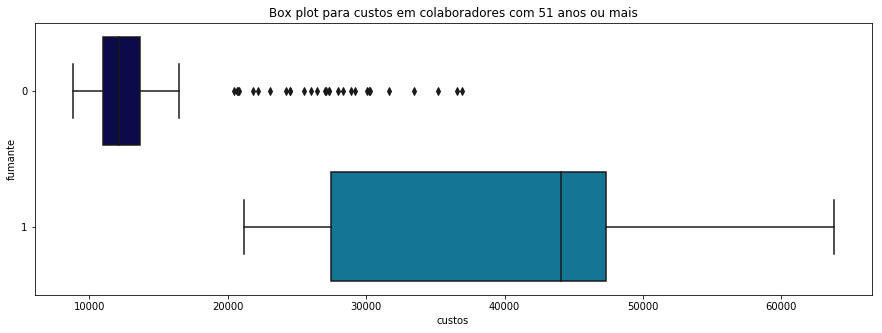

In [84]:
plt.figure(figsize=(15,5))
plt.title("Box plot para custos em colaboradores com 51 anos ou mais")
sns.boxplot(y = 'fumante', x = 'custos', data = dados[dados.idade >= 51] , orient = 'h', palette = 'ocean')

Podemos plotar um gráfico de dispersão para analisar o comportamento dos dados:

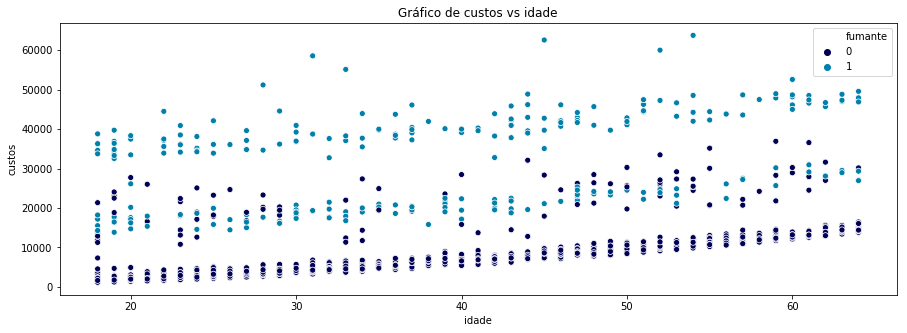

In [85]:
plt.figure(figsize=(15,5))
plt.title('Gráfico de custos vs idade')
sns.scatterplot(x = 'idade', y = 'custos', hue = 'fumante', data=dados, palette='ocean')

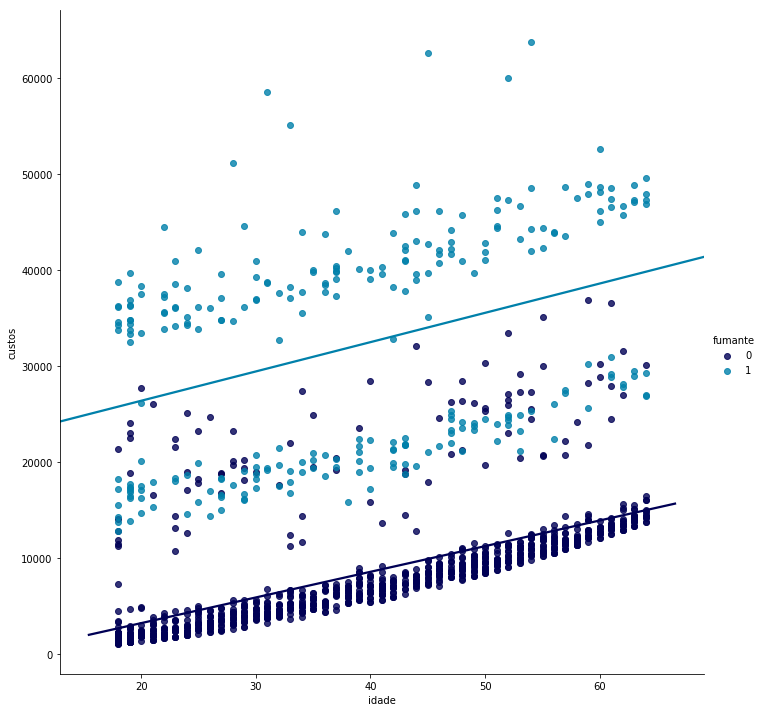

In [86]:
sns.lmplot(x = 'idade', y = 'custos', hue = 'fumante', data = dados, palette='ocean', height = 10, ci = None)
# plt.ylim(0, 1000000)

## Desafio

Faça o mesmo estudo que realizamos porém agora levando em consideração o IMC dos colaboradores. Lembre que consideramos uma pessoa obesa com um IMC maior ou igual a 30.

![title](http://especiais.gshow.globo.com/programas/estrelas/calculo-imc/img/table-web.jpg)

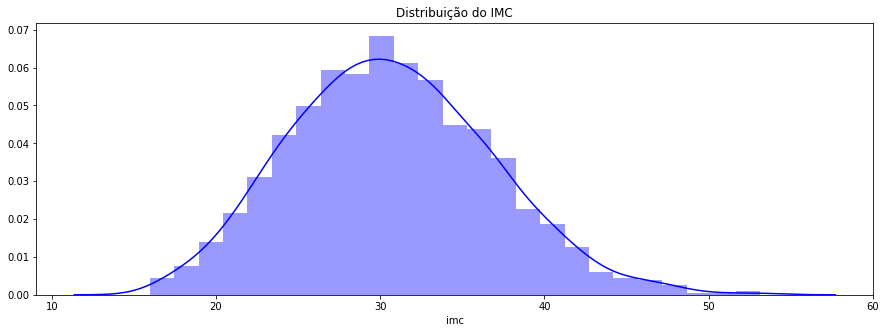

In [87]:
# Histograma da distribuição dos valores de IMC

plt.figure(figsize=(15,5))
plt.title('Distribuição do IMC')
sns.distplot(dados['imc'], color = 'blue')

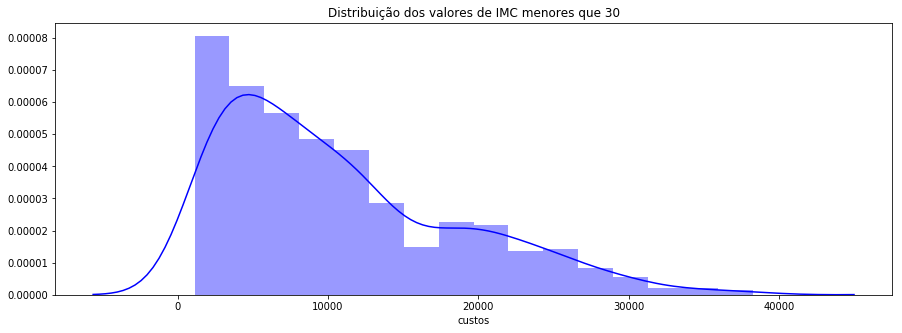

In [88]:
# Histograma da distribuição dos valores de IMC menores que 30
plt.figure(figsize=(15,5))
plt.title('Distribuição dos valores de IMC menores que 30')
ax = sns.distplot(dados[(dados.imc < 30)]['custos'], color = 'blue')

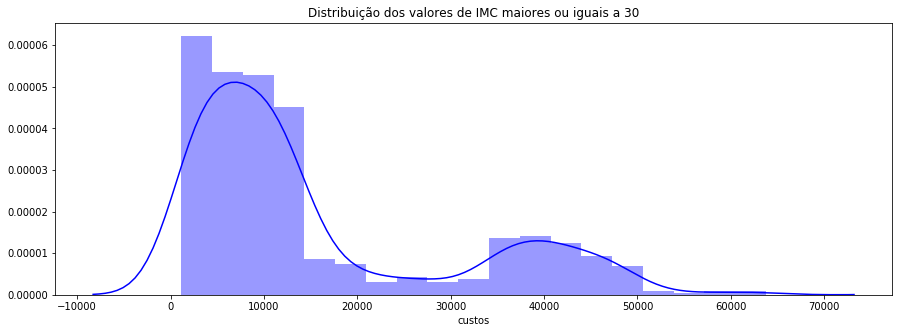

In [90]:
# Histograma da distribuição dos valores de IMC maiores ou iguais a 30
plt.figure(figsize=(15,5))
plt.title('Distribuição dos valores de IMC maiores ou iguais a 30')
ax = sns.distplot(dados[(dados.imc >= 30)]['custos'], color = 'blue')

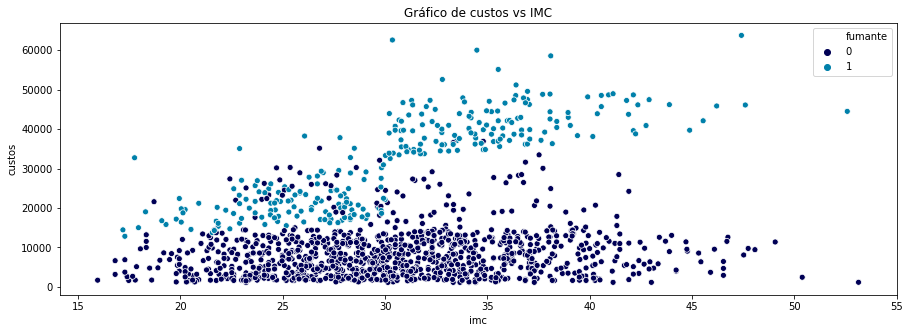

In [91]:
# Gráfico de dispersão Custos vs IMC
plt.figure(figsize=(15,5))
plt.title('Gráfico de custos vs IMC')
sns.scatterplot(x = 'imc', y = 'custos', hue = 'fumante', data=dados, palette='ocean')